In [1]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,15
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
Chocolate  = pd.read_csv('chocolate-bar-ratings/flavors_of_cacao.csv')#датасет про шоколадные батончики. Содержит информацию о 
#производителе, проценте какао, типе какао-бобов и их происхождении

In [3]:
Chocolate.head()

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


Столбцы:

    Company  (Maker-if known) - производитель;
    Specific Bean Origin or Bar Name - конкретный географический регион происхождения шоколада;
    REF - не особо важная информация - показатель, когда был добавлен отзыв о шоколаде на сайт. 
    Чем выше, тем познее был добавлен;
    Review Date - дата добавления информации о шоколаде на сайт;
    Cocoa Percent - процент содержания какао;
    Company Location - страна производителя;
    Rating - рейтинг:
        5= Elite (Transcending beyond the ordinary limits)
        4= Premium (Superior flavor development, character and style)
        3= Satisfactory(3.0) to praiseworthy(3.75) (well made with special qualities)
        2= Disappointing (Passable but contains at least one significant flaw)
        1= Unpleasant (mostly unpalatable)
    Bean Type - разнообразие используемых видов какао-бобов. Не все данные;
    Broad Bean Origin - расширенный регион, в котором растут какао-бобы
    

In [4]:
Chocolate.columns = ['Company', 'Origin', 'REF', 'Review_Date', 'Cocoa_Percent', 'Company_Location', 
              'Rating', 'Bean_Type', 'Bean_Origin']

In [5]:
Chocolate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
Company             1795 non-null object
Origin              1795 non-null object
REF                 1795 non-null int64
Review_Date         1795 non-null int64
Cocoa_Percent       1795 non-null object
Company_Location    1795 non-null object
Rating              1795 non-null float64
Bean_Type           1794 non-null object
Bean_Origin         1794 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [6]:
Chocolate.head()

,Company,Origin,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Bean_Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [7]:
#Убрать знак % из Cocoa Percent
Chocolate['Cocoa_Percent'] = Chocolate['Cocoa_Percent'].str.replace('%','').astype(float)/100
Chocolate.head()

,Company,Origin,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Bean_Origin
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,,Peru


Основные регионы происхождения

In [8]:
Chocolate_Origin=Chocolate.groupby('Origin').count()[['REF']].reset_index().sort_values('REF', ascending=False).head(15)
Chocolate_Origin.head()

,Origin,REF
564,Madagascar,57
754,Peru,45
334,Ecuador,42
312,Dominican Republic,37
1001,Venezuela,21


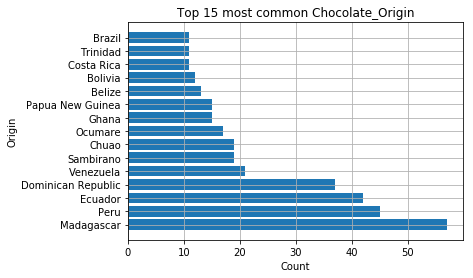

In [9]:
plt.barh(Chocolate_Origin['Origin'], Chocolate_Origin['REF'])
plt.xlabel('Count')
plt.ylabel('Origin')
plt.title('Top 15 most common Chocolate_Origin')
plt.grid()

Самый часто встречающийся регион происхождения - Мадагаскар

Рейтинг качества шоколада по расширенному региону

In [10]:
top_Total = Chocolate['Bean_Origin'].value_counts().sort_values(ascending = False).head(5).index.values
top_Total

array(['Venezuela', 'Ecuador', 'Peru', 'Madagascar', 'Dominican Republic'],
      dtype=object)

In [11]:
import seaborn as sns

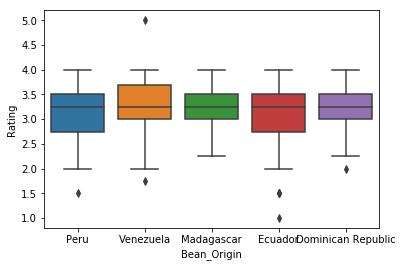

In [12]:
sns.boxplot(x="Bean_Origin", y="Rating", 
            data=Chocolate[Chocolate['Bean_Origin'].isin(top_Total)])

Как видим, медианное значение рейтинга по регионам почти не отличается. Но по Венесуэлле чуть больше количество шоколада с рейтингом от 3,25 до 3,75. И есть какой-то видимо супер вкусный шоколад с ерйтингом 5.

Распределение по % содержания какао


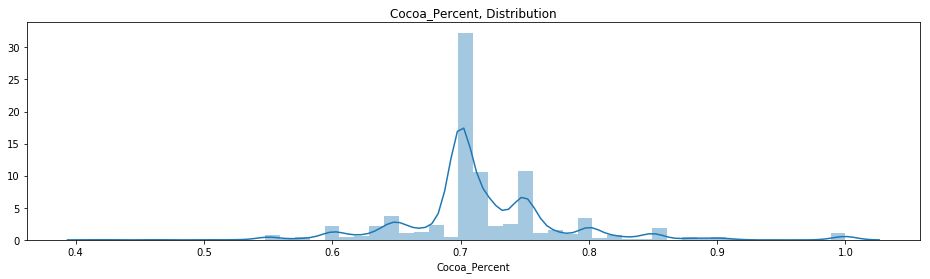

In [13]:
fig, ax = plt.subplots(figsize=[16,4])
sns.distplot(Chocolate['Cocoa_Percent'], ax=ax)
ax.set_title('Cocoa_Percent, Distribution')
plt.show()

Распределение более менее похоже на нормальное, болюше всего у нас батончиков с содержанием какао чуть больше 70%.

Количество производителей в сране по проценту содержания какао в шоколаде

In [14]:
#процентные группы
def map_to_p(l):
    if l <= 0.4:
        return 0.4
    elif 0.4 < l <= 0.6:
        return 0.6
    elif 0.6 < l <= 0.7:
        return 0.7
    elif 0.7 < l <= 0.8:
        return 0.8
    elif 0.8 < l <= 0.9:
        return 0.9
    else:
        return 1

In [15]:
Chocolate["Cocoa_Percent_groupe"] = Chocolate.Cocoa_Percent.apply(lambda l: map_to_p(l))

In [16]:
Chocolate.head()

,Company,Origin,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Bean_Origin,Cocoa_Percent_groupe
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome,0.7
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,,Togo,0.7
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,,Togo,0.7
3,A. Morin,Akata,1680,2015,0.70,France,3.50,,Togo,0.7
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,,Peru,0.7


In [17]:
#Страны по количеству производителей
Chocolate_top_Company_Location=Chocolate['Company_Location'].value_counts().sort_values(ascending = False).head(5).index.values
Chocolate_top_Company_Location



array(['U.S.A.', 'France', 'Canada', 'U.K.', 'Italy'], dtype=object)

In [18]:
#Оставим только эти страны
Chocolate_Company=Chocolate[Chocolate['Company_Location'].isin(Chocolate_top_Company_Location)]
Chocolate_Company.head()

,Company,Origin,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Bean_Origin,Cocoa_Percent_groupe
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome,0.7
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,,Togo,0.7
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,,Togo,0.7
3,A. Morin,Akata,1680,2015,0.70,France,3.50,,Togo,0.7
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,,Peru,0.7


In [19]:
Chocolate_Company_piv = Chocolate_Company.pivot_table(
                        index='Company_Location', 
                        columns='Cocoa_Percent_groupe', 
                        values='Cocoa_Percent', 
                        aggfunc='count').fillna(0).applymap(float)

Chocolate_Company_piv

Cocoa_Percent_groupe,0.6,0.7,0.8,0.9,1.0
Company_Location,,,,,
Canada,0.0,77.0,41.0,4.0,3.0
France,7.0,66.0,76.0,4.0,3.0
Italy,2.0,46.0,12.0,0.0,3.0
U.K.,0.0,33.0,51.0,6.0,6.0
U.S.A.,27.0,411.0,291.0,31.0,4.0


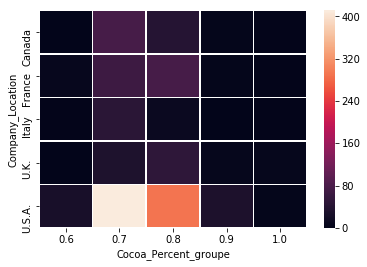

In [20]:
sns.heatmap(Chocolate_Company_piv, annot=False, 
            linewidths=0.5)

Интересно, больше всего производителей 70% и 80% шоколада в США. При этом производителей 70% шоколада в США больше, чем 80%.
Хотя во Франции и в Великобритании в рамках этих стран больше производителей 80% шоколада.

Производитель, средний рейтинг и максимальный рейтинг, количество

In [21]:
Chocolate_top_Company=Chocolate['Company'].value_counts().sort_values(ascending = False).head(10).index.values
Chocolate_top_Company

array(['Soma', 'Bonnat', 'Fresco', 'Pralus', 'A. Morin', 'Arete',
       'Guittard', 'Domori', 'Valrhona', 'Hotel Chocolat (Coppeneur)'],
      dtype=object)

In [22]:
#Оставим только эти компании
Chocolate_top_Company_vend=Chocolate[Chocolate['Company'].isin(Chocolate_top_Company)]
Chocolate_top_Company_vend.head()

,Company,Origin,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Bean_Origin,Cocoa_Percent_groupe
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome,0.7
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,,Togo,0.7
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,,Togo,0.7
3,A. Morin,Akata,1680,2015,0.70,France,3.50,,Togo,0.7
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,,Peru,0.7


In [24]:
ChocolateRating=Chocolate_top_Company_vend.groupby('Company').agg({'Rating': 'mean','Cocoa_Percent':'mean', 'REF': 'count'}).reset_index()
ChocolateRating

,Company,Rating,Cocoa_Percent,REF
0,A. Morin,3.380435,0.690870,23
1,Arete,3.534091,0.706364,22
2,Bonnat,3.435185,0.755556,27
3,Domori,3.477273,0.715000,22
4,Fresco,3.384615,0.711923,26
5,Guittard,3.170455,0.665455,22
6,Hotel Chocolat (Coppeneur),2.973684,0.781053,19
7,Pralus,3.280000,0.762000,25
8,Soma,3.585106,0.709149,47
9,Valrhona,3.333333,0.675238,21


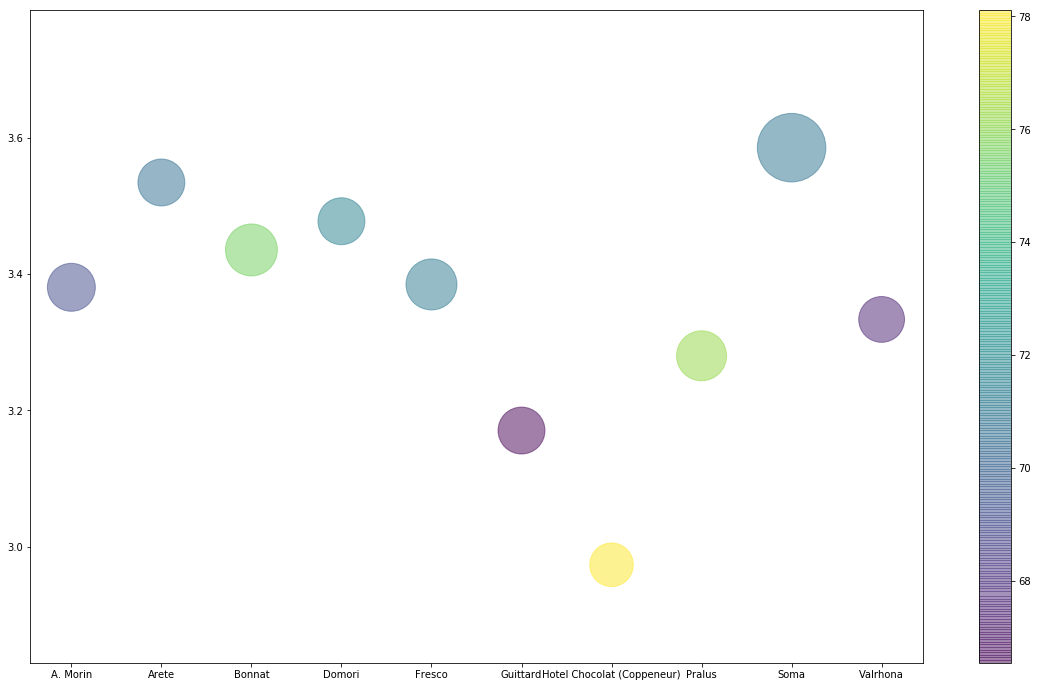

In [30]:
plt.scatter(ChocolateRating['Company'], ChocolateRating['Rating'], s=ChocolateRating['REF']*100, c=ChocolateRating['Cocoa_Percent']*100, alpha=0.5)
fig=plt.gcf()
plt.colorbar()
fig.set_size_inches(20,12)
plt.show()

По оси х - названия производителей;
По оси у - средний рейтинг;
Размер круга - количество выпускаемых наименований;
Цвет - средний процент какао.
Интересно, что компания Hotel Chocolat (Coppeneur) имеет самый низкий средний рейтинг, но при этом этом самое высокое среднее содержание какао.
А компания Soma производит больше всего наименований, с самым высоким средним рейтингом, но при этом средний процент содержания какао невысокий.
Видимо всем больше нравится молочный шоколад, а популярность горького не такая высокая)

In [60]:
#Средний рейтинг шоколада по типу используемых зерен какао
Chocolate_Origin_Rating=Chocolate.groupby('Bean_Type').agg({'Rating': 'mean','Cocoa_Percent':'mean', 'REF': 'count'}).reset_index().sort_values('REF', ascending=False).head(15)
Chocolate_Origin_Rating

,Bean_Type,Rating,Cocoa_Percent,REF
40,,3.137542,0.715569,887
32,Trinitario,3.245823,0.717411,419
7,Criollo,3.240196,0.720131,153
19,Forastero,3.100575,0.720575,87
25,Forastero (Nacional),3.269231,0.730192,52
4,Blend,3.353659,0.713902,41
17,"Criollo, Trinitario",3.294872,0.722051,39
21,Forastero (Arriba),2.831081,0.731351,37
13,Criollo (Porcelana),3.375000,0.703000,10
36,"Trinitario, Criollo",3.027778,0.683333,9


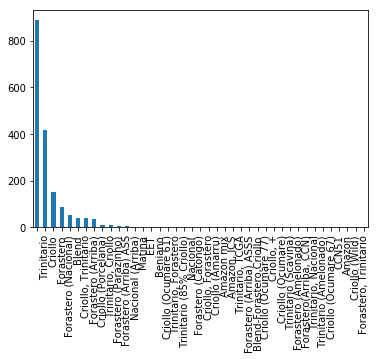

In [48]:
Chocolate['Bean_Type'].value_counts().sort_values(ascending = False).plot.bar()


У большего количества шоколада тип зерен неизвестнет, но среди тех, которые известные, самый популярный - Trinitario

Самые популярные - Trinitario, Criollo и Forastero

In [65]:
Chocolate.loc[Chocolate.Bean_Type.isin(['Trinitario' ,'Criollo','Forastero'])].head()

,Company,Origin,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Bean_Origin,Cocoa_Percent_groupe
5,A. Morin,Carenero,1315,2014,0.7,France,2.75,Criollo,Venezuela,0.7
7,A. Morin,Sur del Lago,1315,2014,0.7,France,3.50,Criollo,Venezuela,0.7
8,A. Morin,Puerto Cabello,1319,2014,0.7,France,3.75,Criollo,Venezuela,0.7
11,A. Morin,Madagascar,1011,2013,0.7,France,3.00,Criollo,Madagascar,0.7
17,A. Morin,Chuao,1015,2013,0.7,France,4.00,Trinitario,Venezuela,0.7


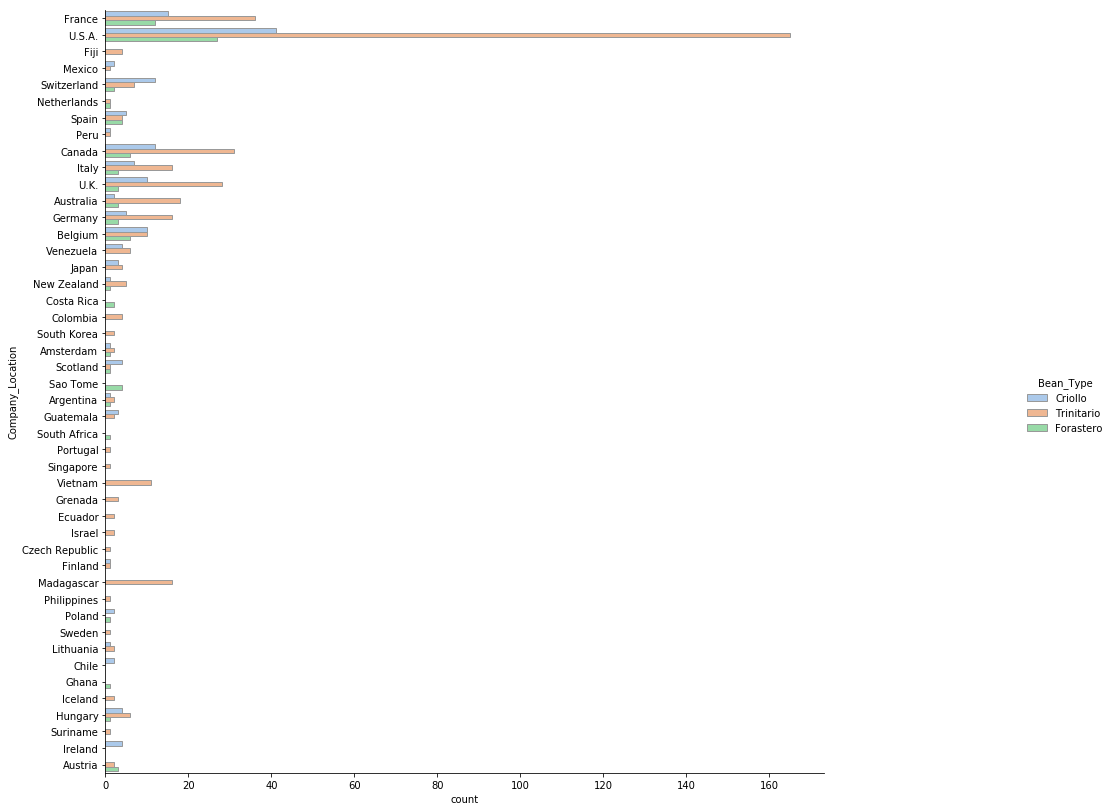

In [68]:
sns.catplot(y="Company_Location", hue="Bean_Type", kind="count",
            palette="pastel", edgecolor=".6",
            data=Chocolate.loc[Chocolate.Bean_Type.isin(['Trinitario' ,'Criollo','Forastero'])])
fig=plt.gcf()

fig.set_size_inches(20,12)
plt.show()

По странам производителям основным типом какао-бобов, испольщуемых в производстве, является Trinitario. Подавляющее большинство шоколада из этих бобов произведено в США.